<a href="https://colab.research.google.com/github/santolina/Tensorflow-Dev/blob/master/Colorization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 %tensorflow_version 2.x

TensorFlow 2.x selected.


In [41]:
import tensorflow as tf
import glob
import os
import math
import numpy as np
import matplotlib.pyplot as plt

tf.__version__

'2.0.0'

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [24]:
# move colab notebooks
%cd ~/
%cd /content/drive
%cd My\ Drive
%cd Colab\ Notebooks


/root
/content/drive
/content/drive/My Drive
/content/drive/My Drive/Colab Notebooks


In [25]:
ls 


'Cats-v-Dogs-Augmentation.ipynb のコピー'
 Colab1-for-deeplearn
'Colorization (1).ipynb'
 Colorization.ipynb
'Convolutions Sidebar'
'Coure 3 week 3 text_generation'
'Course 1 - Part 4 - Lesson 2 - Notebook'
'Course 1 - Part 4 - Lesson 4 - Notebook'
'Course 1 - Part 6 - Lesson 2 - Notebook'
'Course 1 - Part 8 - Lesson 4 - Notebook'
'Course 2 - Part 2 - Lesson 3 - Notebook'
'Course 2 - Part 4 - Lesson 2 - Notebook.ipynb のコピー'
'Course 3 - Week 2 - Exercise - Answer'
'Course 3 - Week 2 - Exercise - Question'
'Course 3 - Week 2 - Lesson 1'
'Course 3 - Week 3 - Lesson 1a'
'Course 3 - Week 3 - Lesson 1a (1)'
'Course 3 - Week 3 - Lesson 1b'
'Course 3 - Week 3 - Lesson 2'
'Course 3 - Week 3 - Lesson 2c.ipynb のコピー'
'Course 3 - Week 3 - Lesson 2d'
'Course 4 S+P Week 2 Exercise Answer'
'Course 4 S+P Week 2 Exercise Question'
'Course 4 S+P Week 2 Lesson 2'
'Course 4 S+P Week 3 Exercise Answer.ipynb'
'Course 4 S+P Week 3 Exercise Question'
'Course 4 S+P Week 3 Exercise Question (1)'
'Course 4 S+P Wee

In [36]:
# download Low Res Images from DIV2K https://data.vision.ee.ethz.ch/cvl/DIV2K/

#!wget --no-check-certificate  http://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_LR_x8.zip  
#!unzip DIV2K_train_LR_x8.zip 


'/content/drive/My Drive/Colab Notebooks/ml_dataset'

In [0]:
# define dataset
data_path = "/content/drive/My Drive/Colab Notebooks/ml_dataset/DIV2K_train_LR_x8"
data_lists = glob.glob(os.path.join(data_path, '*.png'))

valid_n_sample  = math.floor(len(data_lists)*0.1)
test_n_sample = math.floor(len(data_lists)*0.1) 
train_n_sample = len(data_lists) - valid_n_sample - test_n_sample

valid_lists = data_lists[:valid_n_sample]
test_lists = data_lists[valid_n_sample: valid_n_sample + test_n_sample]
train_lists = data_lists[valid_n_sample + test_n_sample:]


In [116]:
print(valid_lists[0:10])

['/content/drive/My Drive/Colab Notebooks/ml_dataset/DIV2K_train_LR_x8/0678x8.png', '/content/drive/My Drive/Colab Notebooks/ml_dataset/DIV2K_train_LR_x8/0386x8.png', '/content/drive/My Drive/Colab Notebooks/ml_dataset/DIV2K_train_LR_x8/0633x8.png', '/content/drive/My Drive/Colab Notebooks/ml_dataset/DIV2K_train_LR_x8/0603x8.png', '/content/drive/My Drive/Colab Notebooks/ml_dataset/DIV2K_train_LR_x8/0110x8.png', '/content/drive/My Drive/Colab Notebooks/ml_dataset/DIV2K_train_LR_x8/0725x8.png', '/content/drive/My Drive/Colab Notebooks/ml_dataset/DIV2K_train_LR_x8/0445x8.png', '/content/drive/My Drive/Colab Notebooks/ml_dataset/DIV2K_train_LR_x8/0210x8.png', '/content/drive/My Drive/Colab Notebooks/ml_dataset/DIV2K_train_LR_x8/0599x8.png', '/content/drive/My Drive/Colab Notebooks/ml_dataset/DIV2K_train_LR_x8/0732x8.png']


In [0]:
#  9.3.3 前処理: RBG-to-LAB conversion
import cv2
from PIL import Image

img_size = 224

# helper function
def load_img(src, target_size):
  img = Image.open(src)
  img_resize = img.resize(target_size)
  return np.array(img_resize)

def rgb2lab(rgb):
  assert rgb.dtype == 'uint8'
  return cv2.cvtColor(rgb, cv2.COLOR_RGB2Lab)

def lab2rgb(lab):
  assert lab.dtype == 'uint8'
  return cv2.cvtColor(lab, cv2.COLOR_Lab2RGB)

def get_lab_from_data_list(data_list):
  x_lab = []
  for f in data_list:
    rgb = load_img(f, target_size=(img_size, img_size)).astype(np.uint8)
    lab = rgb2lab(rgb)
    x_lab.append(lab)
  return np.stack(x_lab)

In [0]:
img = load_img(test_lists[0], target_size=(image_size, image_size))

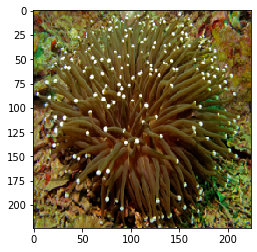

In [119]:
plt.imshow(img)

In [0]:
lab = rgb2lab(img.astype(np.uint8))

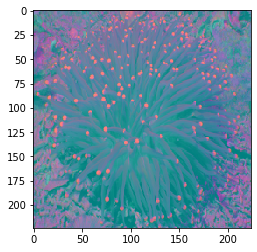

In [121]:
plt.imshow(lab)

In [122]:
img.shape

(224, 224, 3)

In [123]:
# 9.3.4 モデルの構築
from tensorflow.python.keras.layers import Conv2DTranspose

# Encoder
l1= tf.keras.layers.Conv2D(32, (3, 3), (1,1), activation='relu',  padding='same', input_shape=(224, 224, 1))

# 112x112
l2= tf.keras.layers.Conv2D(64, (3, 3), (2, 2), activation='relu', padding='same')

# 66x66
l3= tf.keras.layers.Conv2D(128, (3, 3), (2, 2), activation='relu', padding='same')

# 33x33
l4= tf.keras.layers.Conv2D(256, (3, 3), (2, 2), activation='relu', padding='same')

# Decoder
# 33x33
l5= tf.keras.layers.Conv2DTranspose(128, (3, 3), (2, 2), activation='relu', padding='same')

# 66x66
l6= tf.keras.layers.Conv2DTranspose(64, (3, 3), (2, 2), activation='relu', padding='same')

# 112x112
l7= tf.keras.layers.Conv2DTranspose(32, (3, 3), (2, 2), activation='relu', padding='same')

#224x224
l8= tf.keras.layers.Conv2D(2, (1, 1), (1, 1), activation='relu', padding='same')


autoencoder = tf.keras.Sequential()
autoencoder.add(l1)
autoencoder.add(l2)
autoencoder.add(l3)
autoencoder.add(l4)
autoencoder.add(l5)
autoencoder.add(l6)
autoencoder.add(l7)
autoencoder.add(l8)

autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_70 (Conv2D)           (None, 224, 224, 32)      320       
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 112, 112, 64)      18496     
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 56, 56, 128)       73856     
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 28, 28, 256)       295168    
_________________________________________________________________
conv2d_transpose_43 (Conv2DT (None, 56, 56, 128)       295040    
_________________________________________________________________
conv2d_transpose_44 (Conv2DT (None, 112, 112, 64)      73792     
_________________________________________________________________
conv2d_transpose_45 (Conv2DT (None, 224, 224, 32)     

In [0]:
# define generator
def generator_with_preprocessing(data_list, batch_size, shuffle=False):
  while True:
    if shuffle:
      np.random.shuffle(data_list)
    for i in range(0, len(data_list), batch_size):
      batch_list = data_list[i:i+batch_size]
      batch_lab = get_lab_from_data_list(batch_list)
      batch_l = batch_lab[:, :, :, 0:1]
      batch_ab = batch_lab[:, :, :, 1:]
      yield (batch_l, batch_ab)
      

In [0]:
# call generator
batch_size = 30

train_gen = generator_with_preprocessing(train_lists, batch_size, shuffle=True)
valid_gen = generator_with_preprocessing(train_lists, batch_size, shuffle=True)
test_gen = generator_with_preprocessing(train_lists, batch_size, shuffle=True)

train_steps = math.ceil(len(train_lists)/batch_size)
valid_steps = math.ceil(len(valid_lists)/batch_size)
test_steps = math.ceil(len(test_lists)/batch_size)


In [0]:
# training
epochs = 100

lr_schedule = tf.keras.callbacks.LearningRateScheduler( lambda epoch: 1e-8 * 10**(epoch/20) )

history = autoencoder.fit_generator(
    generator = train_gen,
    steps_per_epoch=train_steps,
    epochs = epochs,
    validation_data = valid_gen, 
    validation_steps = valid_steps, verbose = 1  
)


Epoch 1/100
22/22 [==============================] - 169s 8s/step - loss: 3170.7908 - val_loss: 2709.9885
Epoch 2/100
22/22 [==============================] - 167s 8s/step - loss: 2518.3168 - val_loss: 2285.9073
Epoch 3/100
22/22 [==============================] - 168s 8s/step - loss: 2316.8445 - val_loss: 3186.6005
Epoch 4/100
22/22 [==============================] - 183s 8s/step - loss: 2436.3829 - val_loss: 1981.6354
Epoch 5/100
22/22 [==============================] - 178s 8s/step - loss: 2269.8873 - val_loss: 2432.6921
Epoch 6/100
22/22 [==============================] - 166s 8s/step - loss: 2053.2874 - val_loss: 1659.3826
Epoch 7/100
22/22 [==============================] - 174s 8s/step - loss: 1766.1165 - val_loss: 1654.8075
Epoch 8/100
22/22 [==============================] - 176s 8s/step - loss: 1831.5891 - val_loss: 2131.2817
Epoch 9/100
22/22 [==============================] - 180s 8s/step - loss: 1878.5890 - val_loss: 1681.1146
Epoch 10/100
 1/22 [>.........................

In [0]:
# model prediction

preds = autoencoder.predict_generator(test_gen, sptes=test_steps, verbose=1)

x_test = []
y_test = []

for i, (l, ab) in enumerate (generator_with_preprocessing(test_lists, batch_size)):
  x_test.append(l)
  y_test.append(ab)
  if i==(test_sptes - 1):
    break

x_test = np.vstack(x_test)
y_test = np.vstack(y_test)


In [0]:
test_preds_lab = np.concatenate((x_test, preds), 3).astype(np.uint8)

test_preds_rgb = []

for i in range(test_preds_lab.shape[0]):
  preds_rgb = lab2rgb(test_preds_lab[i, :, :, :])
  test_preds_rgb.append(preds_rgb)
test_preds_rgb = np.stack(test_preds_rgb)


In [0]:
# output prediction image
from IPython.display import display_png
from PIL import Image, ImageOps

for i in range(test_preds_rgb.shape[0]):
  gray_image = ImageOps.grayscale(Image(test_preds_rgb[i]))
  display_png(gray_img)
  display_png(Image(test_preds_rgb[i]))
  print('-'*25)
  if i==20:
    break